## [채무 상환] : 상환 여부를 예측하기 위한 랜덤포레스트 분석을 실시하고 결과를 해석하시오.

In [4]:
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib

from sklearn.model_selection import train_test_split

from sklearn.tree import export_graphviz

import graphviz

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

In [2]:
import matplotlib as mpl
import matplotlib.font_manager as fm
font_location = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_name = fm.FontProperties(fname = font_location).get_name()
mpl.rc('font',family= 'Malgun Gothic')
import warnings
warnings.filterwarnings('ignore')

In [3]:
#한글사용

import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

font_manager.get_fontconfig_fonts()

fontname = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
fontname = font_manager.FontProperties(fname=fontname).get_name()
plt.style.use('seaborn-white')
rc('font', family=fontname)

### 1. 데이터 구성하기

In [5]:
df_raw = pd.read_csv('/home/pirl/Downloads/data2/HMEQ.csv')
df_raw.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1700,30548,40320.0,HomeImp,Other,9.0,0,0.0,101.466002,1.0,8,37.113614
1,1,1800,28502,43034.0,HomeImp,Other,11.0,0,0.0,88.766030,0.0,8,36.884894
2,0,2300,102370,120953.0,HomeImp,Office,2.0,0,0.0,90.992533,0.0,13,31.588503
3,1,2400,34863,47471.0,HomeImp,Mgr,12.0,0,0.0,70.491080,1.0,21,38.263601
4,0,2400,98449,117195.0,HomeImp,Office,4.0,0,0.0,93.811775,0.0,13,29.681827


In [6]:
df_raw.isnull().sum()

BAD          0
LOAN         0
MORTDUE      0
VALUE       14
REASON       0
JOB         81
YOJ        205
DEROG        0
DELINQ      30
CLAGE       37
NINQ        56
CLNO         0
DEBTINC      0
dtype: int64

In [7]:
#JOB 변수의 결측치는 other 로 대체
df_raw['JOB'].fillna('Other', inplace = True) #fillna 함수 적용 후 df_raw 데이터에 저장 : inplace = True

#숫자형 변수의 결측치는 평균값 입력
df_raw.fillna(df_raw.mean(), inplace=True)

In [8]:
df_raw.isnull().sum()

BAD        0
LOAN       0
MORTDUE    0
VALUE      0
REASON     0
JOB        0
YOJ        0
DEROG      0
DELINQ     0
CLAGE      0
NINQ       0
CLNO       0
DEBTINC    0
dtype: int64

In [9]:
df_raw_dummy = pd.get_dummies(df_raw)
df_raw_dummy.head()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_DebtCon,REASON_HomeImp,JOB_Mgr,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
0,1,1700,30548,40320.0,9.0,0,0.0,101.466002,1.0,8,37.113614,0,1,0,0,1,0,0,0
1,1,1800,28502,43034.0,11.0,0,0.0,88.766030,0.0,8,36.884894,0,1,0,0,1,0,0,0
2,0,2300,102370,120953.0,2.0,0,0.0,90.992533,0.0,13,31.588503,0,1,0,1,0,0,0,0
3,1,2400,34863,47471.0,12.0,0,0.0,70.491080,1.0,21,38.263601,0,1,1,0,0,0,0,0
4,0,2400,98449,117195.0,4.0,0,0.0,93.811775,0.0,13,29.681827,0,1,0,1,0,0,0,0


In [10]:
#목표변수, 설명변수 데이터 지정
df_raw_y = df_raw_dummy['BAD']
df_raw_x = df_raw_dummy.drop('BAD',axis=1,inplace=False)

#데이터 분할 (train:test = 7:3)
df_train_x,df_test_x,df_train_y,df_test_y = train_test_split(df_raw_x,df_raw_y,
                                                            test_size=0.3)

print("train data X size : {}".format(df_train_x.shape))
print("train data Y size : {}".format(df_train_y.shape))
print("test data X size : {}".format(df_test_x.shape))
print("test data Y size : {}".format(df_test_y.shape))

train data X size : (2623, 18)
train data Y size : (2623,)
test data X size : (1125, 18)
test data Y size : (1125,)


### 2. 모델생성

In [11]:
#기본 옵션으로 모델생성
gb_uncustomized = GradientBoostingClassifier(random_state=1234)
gb_uncustomized.fit(df_train_x,df_train_y)

print('Accuracy on training set:{:.3f}'.format(gb_uncustomized.score(df_train_x,df_train_y)))
print('Accuracy on test set:{:.3f}'.format(gb_uncustomized.score(df_test_x,df_test_y)))

Accuracy on training set:0.964
Accuracy on test set:0.941


In [12]:
gb_uncustomized

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=1234,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [16]:
#learning_rate : 학습률 변경에 따른 모델 성능
train_accuracy =[]; test_accuracy=[]
para_lr =[lr * 0.1 for lr in range(1,10)]

for v_learning_rate in para_lr:
    gb=GradientBoostingClassifier(learning_rate = v_learning_rate, random_state=1234)
    gb.fit(df_train_x,df_train_y)
    train_accuracy.append(gb.score(df_train_x,df_train_y))
    test_accuracy.append(gb.score(df_test_x,df_test_y))
    
df_accuracy_lr = pd.DataFrame()
df_accuracy_lr['LearningRate'] = para_lr
df_accuracy_lr['TrainAccuracy'] = train_accuracy
df_accuracy_lr['TestAccuracy'] = test_accuracy

In [17]:
df_accuracy_lr.round(3)

,LearningRate,TrainAccuracy,TestAccuracy
0,0.1,0.964,0.941
1,0.2,0.980,0.944
2,0.3,0.993,0.937
3,0.4,0.998,0.936
4,0.5,1.000,0.939
5,0.6,1.000,0.936
6,0.7,1.000,0.936
7,0.8,1.000,0.935
8,0.9,0.997,0.940


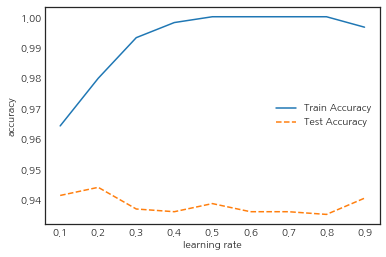

In [18]:
plt.plot(para_lr, train_accuracy, linestyle='-', label='Train Accuracy')
plt.plot(para_lr, test_accuracy, linestyle='--', label='Test Accuracy')
plt.xlabel('learning rate'); plt.ylabel('accuracy')
plt.legend()

학습률 증가에 따라 모델의 정확도는 증가하는데 test 데이터의 성능은 특별히 개선되지 않아 0.1 선택

In [19]:
#n_estimators : 트리 수 변경에 따른 모델 성능
train_accuracy = []; test_accuracy = []

para_n_tree = [n_tree * 10 for n_tree in range(1,16)]

for v_n_estimators in para_n_tree:
    gb=GradientBoostingClassifier(n_estimators=v_n_estimators, learning_rate=0.1, random_state=1234)
    gb.fit(df_train_x, df_train_y)
    train_accuracy.append(gb.score(df_train_x, df_train_y))
    test_accuracy.append(gb.score(df_test_x, df_test_y))

df_accuracy_n = pd.DataFrame()
df_accuracy_n['Estimators'] = para_n_tree
df_accuracy_n['TrainAccuracy'] = train_accuracy
df_accuracy_n['TestAccuracy'] = test_accuracy

In [20]:
df_accuracy_n.round(3)

,Estimators,TrainAccuracy,TestAccuracy
0,10,0.935,0.928
1,20,0.939,0.928
2,30,0.942,0.930
3,40,0.945,0.929
4,50,0.948,0.933
5,60,0.952,0.934
6,70,0.957,0.935
7,80,0.958,0.937
8,90,0.962,0.938
9,100,0.964,0.941


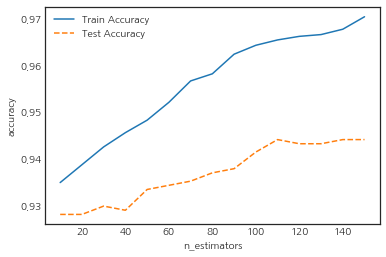

In [21]:
plt.plot(para_n_tree, train_accuracy, linestyle='-', label='Train Accuracy')
plt.plot(para_n_tree, test_accuracy, linestyle='--', label='Test Accuracy')
plt.xlabel('n_estimators'); plt.ylabel('accuracy')
plt.legend()

생성하는 결정 트리 수 증가에 따라 모델의 정확도는 증가하며 train/test 데이터의 성능변화를 고려하여 100을 선택한다.

In [22]:
#max_depth : 최대 깊이 변경에 따른 모델 성능
train_accuracy = []; test_accuracy = []

para_depth = [depth for depth in range(1,11)]

for v_max_depth in para_depth:
    gb=GradientBoostingClassifier(max_depth = v_max_depth, n_estimators = 100,
                                  learning_rate=0.1, random_state=1234)
    gb.fit(df_train_x, df_train_y)
    train_accuracy.append(gb.score(df_train_x, df_train_y))
    test_accuracy.append(gb.score(df_test_x, df_test_y))

df_accuracy_depth = pd.DataFrame()
df_accuracy_depth['Depth'] = para_depth
df_accuracy_depth['TrainAccuracy'] = train_accuracy
df_accuracy_depth['TestAccuracy'] = test_accuracy

In [23]:
df_accuracy_depth.round(3)

,Depth,TrainAccuracy,TestAccuracy
0,1,0.937,0.933
1,2,0.945,0.934
2,3,0.964,0.941
3,4,0.977,0.946
4,5,0.989,0.947
5,6,0.998,0.947
6,7,1.000,0.945
7,8,1.000,0.955
8,9,1.000,0.948
9,10,1.000,0.950


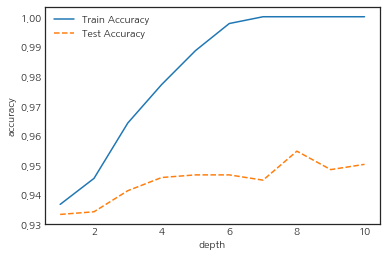

In [24]:
plt.plot(para_depth, train_accuracy, linestyle='-', label='Train Accuracy')
plt.plot(para_depth, test_accuracy, linestyle='--', label='Test Accuracy')
plt.xlabel('depth'); plt.ylabel('accuracy')
plt.legend()

최대 깊이 증가에 따라 모데르이 정확도는 증가하며 train/test 데이터의 성능 변화를 고려하여 4를 선택한다.

In [25]:
#min_samples_split : 분리 노드의 최소 자료 수 변경에 따른 모델 성능
train_accuracy =[]; test_accuracy = []

para_split = [n_split * 10 for n_split in range(2,11)]

for v_min_samples_split in para_split :
    gb=GradientBoostingClassifier(min_samples_split = v_min_samples_split, max_depth=4,
                             n_estimators=100,learning_rate=0.1, random_state=1234)
    gb.fit(df_train_x, df_train_y)
    train_accuracy.append(gb.score(df_train_x,df_train_y))
    test_accuracy.append(gb.score(df_test_x,df_test_y))
    
df_accuracy_split = pd.DataFrame()
df_accuracy_split['MinSamplesSplit'] = para_split
df_accuracy_split['TrainAccuracy'] = train_accuracy
df_accuracy_split['TestAccuracy'] = test_accuracy

In [26]:
df_accuracy_split.round(3)

,MinSamplesSplit,TrainAccuracy,TestAccuracy
0,20,0.973,0.944
1,30,0.975,0.942
2,40,0.970,0.941
3,50,0.967,0.943
4,60,0.966,0.947
5,70,0.967,0.945
6,80,0.965,0.944
7,90,0.963,0.946
8,100,0.962,0.944


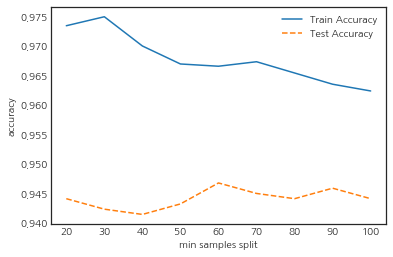

In [27]:
plt.plot(para_split, train_accuracy, linestyle='-', label='Train Accuracy')
plt.plot(para_split, test_accuracy, linestyle='--', label='Test Accuracy')
plt.xlabel('min samples split'); plt.ylabel('accuracy')
plt.legend()

분리 노드의 최소 자료 수 증가에 따라 모델의 정확도는 감소하나 train/test 데이터의 성능에 증감이 발생하고 있어 특정 값을 지정하지 않음

In [28]:
#min_samples_leaf : 잎사귀 노드의 최소 자료 수 변경에 따른 모델 성능
train_accuracy =[]; test_accuracy =[]

para_leaf = [n_leaf * 10 for n_leaf in range(1,11)]

for v_min_samples_leaf in para_leaf:
    gb=GradientBoostingClassifier(min_samples_leaf = v_min_samples_leaf,
                             max_depth =4, n_estimators =100, learning_rate=0.1, random_state=1234)
    gb.fit(df_train_x,df_train_y)
    train_accuracy.append(gb.score(df_train_x,df_train_y))
    test_accuracy.append(gb.score(df_test_x,df_test_y))

df_accuracy_leaf = pd.DataFrame()
df_accuracy_leaf['MinSamplesLeaf'] = para_leaf
df_accuracy_leaf['TrainAccuracy'] = train_accuracy
df_accuracy_leaf['TestAccuracy'] = test_accuracy

In [29]:
df_accuracy_leaf.round(3)

,MinSamplesLeaf,TrainAccuracy,TestAccuracy
0,10,0.971,0.951
1,20,0.969,0.938
2,30,0.965,0.940
3,40,0.962,0.940
4,50,0.959,0.938
5,60,0.958,0.931
6,70,0.955,0.932
7,80,0.952,0.932
8,90,0.952,0.924
9,100,0.944,0.923


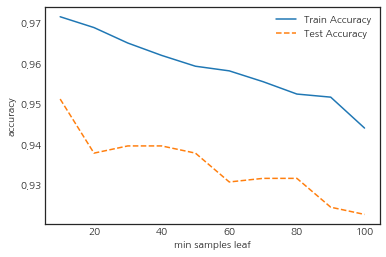

In [30]:
plt.plot(para_leaf, train_accuracy, linestyle='-', label='Train Accuracy')
plt.plot(para_leaf, test_accuracy, linestyle='--', label='Test Accuracy')
plt.xlabel('min samples leaf'); plt.ylabel('accuracy')
plt.legend()

잎사귀 노드 최소 자료 수 증가에 따라 모데르이 정확도는 감소하며 train/test데이터의 성능 변화를 고려하여 10을 선택한다.
### 3. 결론 도출

In [32]:
gb_final = GradientBoostingClassifier(min_samples_leaf = 10, max_depth=4,
                                 n_estimators=100, learning_rate=0.1, random_state=1234)
gb_final.fit(df_train_x, df_train_y)
y_pred = gb_final.predict(df_test_x)

print('Accuracy on training set:{:.3f}'.format(gb_final.score(df_train_x,df_train_y)))
print('Accuracy on test set:{:.3f}'.format(gb_final.score(df_test_x,df_test_y)))
print('Confusion Matrix:\n{}'.format(confusion_matrix(df_test_y,y_pred)))

Accuracy on training set:0.971
Accuracy on test set:0.951
Confusion Matrix:
[[1012    2]
 [  53   58]]


In [33]:
v_feature_name = df_train_x.columns

df_importance = pd.DataFrame()
df_importance['Feature'] = v_feature_name
df_importance['Importance'] = gb_final.feature_importances_

df_importance.sort_values('Importance', ascending=False, inplace=True)
df_importance.round(3)

,Feature,Importance
9,DEBTINC,0.345
6,CLAGE,0.121
2,VALUE,0.102
5,DELINQ,0.097
8,CLNO,0.081
0,LOAN,0.059
4,DEROG,0.045
1,MORTDUE,0.041
7,NINQ,0.041
3,YOJ,0.031


Text(0, 0.5, '설명변수')

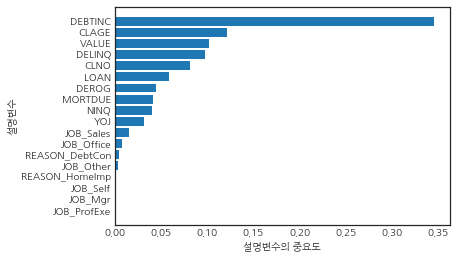

In [35]:
df_importance.sort_values('Importance', ascending=True, inplace=True)
coordinates = range(len(df_importance))
plt.barh(y=coordinates, width = df_importance['Importance'])
plt.yticks(coordinates, df_importance['Feature'])
plt.xlabel('설명변수의 중요도')
plt.ylabel('설명변수')

## [실습] 통신회사의 고객 이탈
고객의 이탈 여부를 예측하기 위한 그래디언트 부스팅 분석을 실시하고 결과를 해석하시오.

In [37]:
df_raw = pd.read_csv("/home/pirl/Downloads/data2/통신고객이탈.csv")
df_raw.head()

,CHURN,CUSTOMER_ID,GENDER,AGE,CHARGE_TYPE,HANDSET,USAGE_BAND,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME
0,Active,K102990,F,31,CAT 100,ASAD170,Med,33.33,6,218,379.8,9,21.6,366,632.4
1,Active,K103280,M,27,CAT 100,S50,Med,30.87,10,373,656.4,11,28.0,411,810.4
2,Active,K103660,M,27,CAT 100,ASAD170,Med,49.40,11,260,582.0,0,0.0,265,614.1
3,Active,K103730,M,61,CAT 100,ASAD170,Med,48.60,1,294,661.8,14,101.5,326,844.0
4,Active,K104560,F,52,CAT 100,S50,Med,56.03,0,221,555.6,7,25.0,274,673.0
